# Import library

In [331]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
## Setting figures to timeseries-friendly
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['figure.facecolor'] = 'white'
sns.set_context("talk", font_scale=0.9)
# set random seed
SEED = 321
np.random.seed(SEED)
#display more columns
pd.set_option('display.max_columns',50)
import glob

In [332]:
fpath =  'C:\\Users\\Ashraf\Desktop\\time series\\Chicago_Crime_2001-2022\\Data'
all_files = glob.glob(fpath + "/*.csv")
dfs= [] 
for filename in all_files:
    df = pd.read_csv(filename, low_memory=False)
    dfs.append(df)

combined_df = pd.concat(dfs)

In [333]:
combined_df.head()
combined_df['Date']

0         01/01/2001 01:00:00 AM
1         01/01/2001 01:00:00 PM
2         01/01/2001 01:00:00 PM
3         01/01/2001 01:00:00 AM
4         01/01/2001 01:00:00 AM
                   ...          
238853    12/31/2022 12:50:00 PM
238854    12/31/2022 12:50:00 PM
238855    12/31/2022 12:52:00 AM
238856    12/31/2022 12:52:00 PM
238857    12/31/2022 12:59:00 PM
Name: Date, Length: 7713109, dtype: object

# Data preprocessing

In [334]:
combined_df.head()
combined_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7713109 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 662.0+ MB


In [335]:
# drop columns 
drop_col  =  ['ID','Domestic','Beat','Ward','Latitude', 'Longitude' ,'Description' ]
combined_df = combined_df.drop(columns= drop_col)
combined_df

,Date,Primary Type,Location Description,Arrest,District
0,01/01/2001 01:00:00 AM,BATTERY,RESIDENCE,False,16.0
1,01/01/2001 01:00:00 PM,BATTERY,RESIDENCE,False,8.0
2,01/01/2001 01:00:00 PM,GAMBLING,STREET,True,3.0
3,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,STREET,False,24.0
4,01/01/2001 01:00:00 AM,BATTERY,RESIDENCE PORCH/HALLWAY,False,2.0
...,...,...,...,...,...
238853,12/31/2022 12:50:00 PM,ASSAULT,APARTMENT,False,10.0
238854,12/31/2022 12:50:00 PM,ASSAULT,APARTMENT,False,7.0
238855,12/31/2022 12:52:00 AM,BATTERY,BARBERSHOP,False,11.0
238856,12/31/2022 12:52:00 PM,ASSAULT,COMMERCIAL / BUSINESS OFFICE,False,14.0


In [336]:
# Preparing the Date Time Index  
combined_df['Date']=  pd.to_datetime(combined_df['Date'] , errors='coerce')
#combined_df['Date'].isna().sum()
# set index
#df.set_index('Date',  inplace=True)

In [337]:
combined_df.set_index('Date',  inplace=True)

In [338]:
combined_df['Primary Type'].value_counts()

THEFT                                1626992
BATTERY                              1410889
CRIMINAL DAMAGE                       878914
NARCOTICS                             746155
ASSAULT                               501103
OTHER OFFENSE                         479174
BURGLARY                              422246
MOTOR VEHICLE THEFT                   366586
DECEPTIVE PRACTICE                    340958
ROBBERY                               289677
CRIMINAL TRESPASS                     212869
WEAPONS VIOLATION                     103906
PROSTITUTION                           69750
OFFENSE INVOLVING CHILDREN             55280
PUBLIC PEACE VIOLATION                 52086
SEX OFFENSE                            30442
CRIM SEXUAL ASSAULT                    27584
INTERFERENCE WITH PUBLIC OFFICER       18206
LIQUOR LAW VIOLATION                   14846
GAMBLING                               14616
ARSON                                  13121
HOMICIDE                               12394
KIDNAPPING

<Axes: >

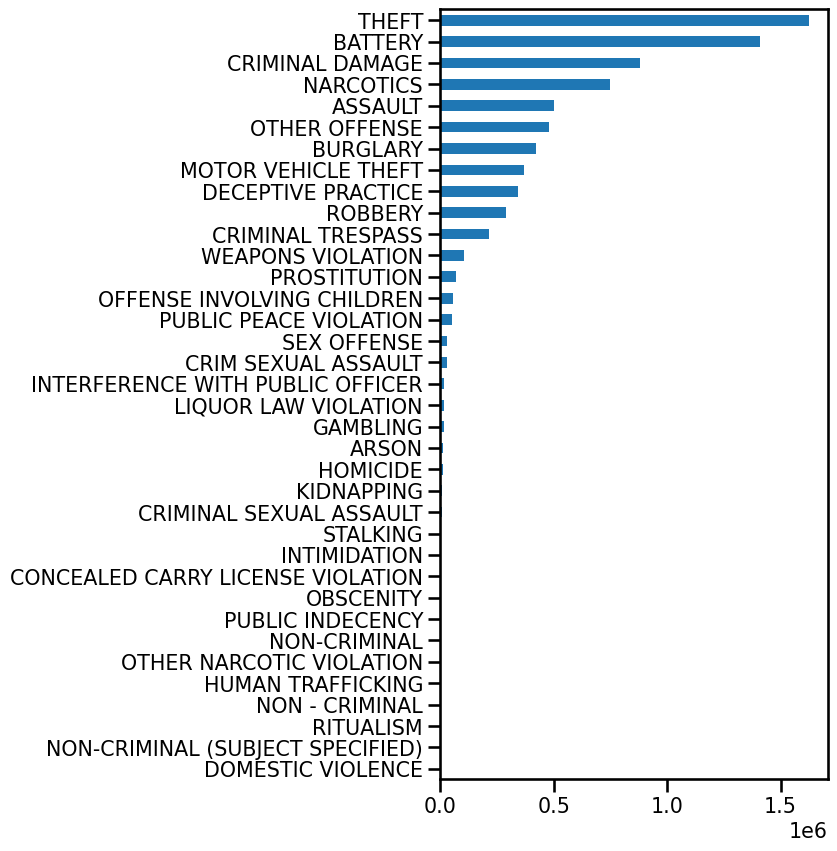

In [339]:
## Inspect the value_counts for the different types of crimes
craime_counts =  combined_df['Primary Type'].value_counts()
craime_counts.sort_values().plot(kind= "barh", figsize= (5,10))


In [340]:
craime_counts =  combined_df['Primary Type'].value_counts().to_frame('Total of Crimes ')
craime_counts

,Total of Crimes
THEFT,1626992
BATTERY,1410889
CRIMINAL DAMAGE,878914
NARCOTICS,746155
ASSAULT,501103
OTHER OFFENSE,479174
BURGLARY,422246
MOTOR VEHICLE THEFT,366586
DECEPTIVE PRACTICE,340958
ROBBERY,289677


In [341]:
# Using Dictionaries and Loops to Prepare Time Series 
crime_list = combined_df['Primary Type'].unique()

# 2. Create an empty dictionary  
CRIMES = {}
# 3. Loop through the list of crimes
for crime in crime_list:
    # I. Save a temp df of just the rows that match the crime
   temp = combined_df.loc[combined_df['Primary Type']==crime].copy()
    # II. Resample the temp DataFrame as Daily data (crime counts) 
    # and keep ONLY the .size() 
   temp_res = temp.resample("D").size() 
   #III. Save the temporary DataFrame in the dictionary,
   #using the crime description as the key.
   CRIMES[crime] = temp_res.copy() 
CRIMES.keys()




dict_keys(['BATTERY', 'GAMBLING', 'CRIMINAL DAMAGE', 'OFFENSE INVOLVING CHILDREN', 'THEFT', 'ASSAULT', 'NARCOTICS', 'CRIM SEXUAL ASSAULT', 'DECEPTIVE PRACTICE', 'WEAPONS VIOLATION', 'OTHER OFFENSE', 'MOTOR VEHICLE THEFT', 'SEX OFFENSE', 'BURGLARY', 'PUBLIC PEACE VIOLATION', 'LIQUOR LAW VIOLATION', 'ROBBERY', 'CRIMINAL TRESPASS', 'INTERFERENCE WITH PUBLIC OFFICER', 'HOMICIDE', 'KIDNAPPING', 'PROSTITUTION', 'STALKING', 'INTIMIDATION', 'CRIMINAL SEXUAL ASSAULT', 'ARSON', 'RITUALISM', 'DOMESTIC VIOLENCE', 'OBSCENITY', 'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY', 'CONCEALED CARRY LICENSE VIOLATION', 'NON-CRIMINAL', 'HUMAN TRAFFICKING', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON - CRIMINAL'])

In [342]:
crims_data = pd.DataFrame(CRIMES)
crims_data

,BATTERY,GAMBLING,CRIMINAL DAMAGE,OFFENSE INVOLVING CHILDREN,THEFT,ASSAULT,NARCOTICS,CRIM SEXUAL ASSAULT,DECEPTIVE PRACTICE,WEAPONS VIOLATION,OTHER OFFENSE,MOTOR VEHICLE THEFT,SEX OFFENSE,BURGLARY,PUBLIC PEACE VIOLATION,LIQUOR LAW VIOLATION,ROBBERY,CRIMINAL TRESPASS,INTERFERENCE WITH PUBLIC OFFICER,HOMICIDE,KIDNAPPING,PROSTITUTION,STALKING,INTIMIDATION,CRIMINAL SEXUAL ASSAULT,ARSON,RITUALISM,DOMESTIC VIOLENCE,OBSCENITY,OTHER NARCOTIC VIOLATION,PUBLIC INDECENCY,CONCEALED CARRY LICENSE VIOLATION,NON-CRIMINAL,HUMAN TRAFFICKING,NON-CRIMINAL (SUBJECT SPECIFIED),NON - CRIMINAL
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-01,296,2.0,233,100,412,70,97,38.0,94,32,167,60,65,66,5,3,41,29,1.0,2,2.0,5.0,1,1.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-02,143,1.0,118,4,221,66,175,2.0,78,9,101,65,4,68,2,2,35,35,1.0,0,1.0,11.0,0,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,165,0.0,136,3,226,79,133,7.0,49,7,96,72,5,57,7,2,51,35,0.0,0,3.0,16.0,1,0.0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-04,173,2.0,133,5,243,57,142,2.0,42,9,96,87,1,55,3,4,55,29,3.0,2,2.0,19.0,0,1.0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-05,178,0.0,142,9,265,68,185,6.0,53,6,90,86,2,55,5,8,55,29,2.0,1,3.0,16.0,0,0.0,0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,76,NaN,64,4,147,47,9,NaN,40,12,33,77,2,17,1,1,27,20,1.0,0,0.0,NaN,1,0.0,4,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2022-12-28,102,NaN,78,3,112,44,12,NaN,38,17,38,103,0,23,1,0,28,12,0.0,1,0.0,NaN,1,0.0,4,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2022-12-29,97,NaN,95,3,137,38,15,NaN,38,11,37,95,3,29,2,0,28,12,1.0,2,1.0,NaN,1,1.0,1,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


# Topic 1) Comparing Police Districts
   *  Which district had the most crimes in 2022?
   *  Which had the least?

<Axes: >

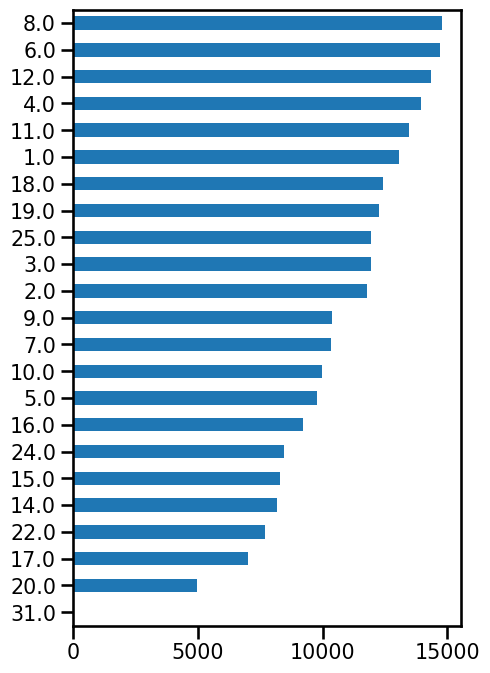

In [343]:
# Which district had the most crimes in 2022?
df_22 = combined_df.loc['2022']
most_crimes_22= df_22['District'].value_counts()
most_crimes_22.sort_values().plot(kind='barh', figsize=(5,8))

In [344]:
most_crimes_22= df['District'].value_counts().to_frame('district had the most crimes in 2022')
most_crimes_22

,district had the most crimes in 2022
8.0,14805
6.0,14694
12.0,14341
4.0,13931
11.0,13457
1.0,13044
18.0,12429
19.0,12243
25.0,11951
3.0,11937


* Which had the least?  
    * district 31  

# Topic 2) Crimes Across the Years:
 * Is the total number of crimes increasing or decreasing across the years?
 * Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?
​

<Axes: title={'center': 'Crimes Across the Years'}>

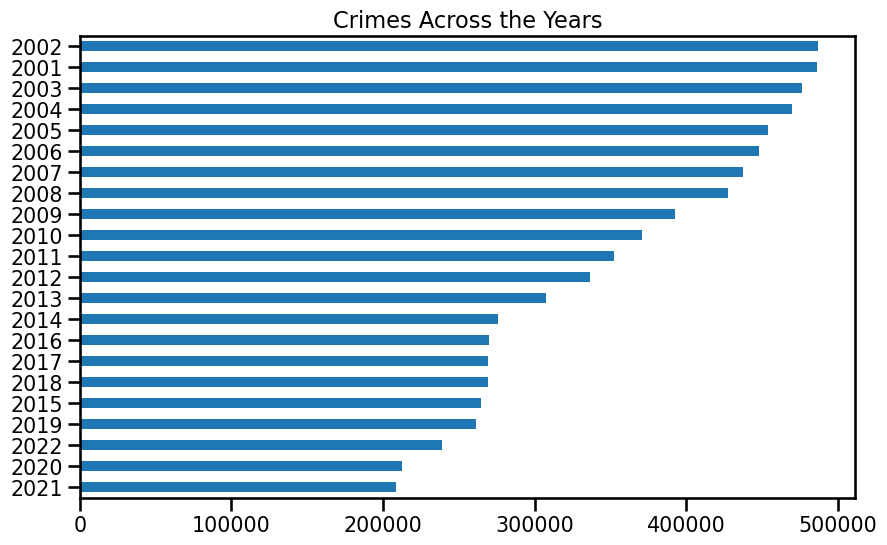

In [345]:
crimes_years =combined_df.index.year.value_counts()
crimes_years.sort_values().plot(kind='barh' , figsize= (10,6) , title = 'Crimes Across the Years')

In [346]:
combined_df['Years'] = combined_df.index.year


<Axes: xlabel='Year', ylabel='# of Crimes'>

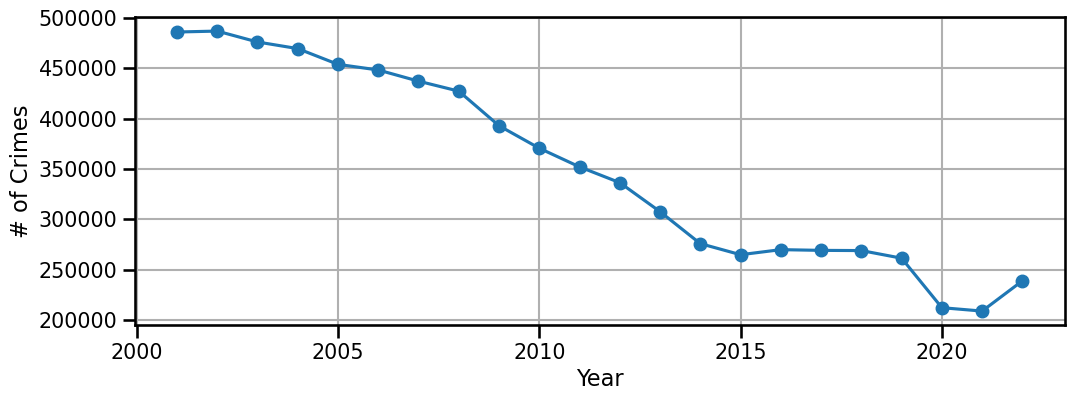

In [347]:
crimes_year = combined_df['Years'].value_counts().sort_index()
crimes_year.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Year')

In [348]:
crimes_per_type_per_year= combined_df.groupby(['Years','Primary Type']).size()
crimes_per_type_per_year


Years  Primary Type                     
2001   ARSON                                 1011
       ASSAULT                              31384
       BATTERY                              93461
       BURGLARY                             26014
       CONCEALED CARRY LICENSE VIOLATION        1
                                            ...  
2022   ROBBERY                               8965
       SEX OFFENSE                           1225
       STALKING                               446
       THEFT                                54820
       WEAPONS VIOLATION                     8766
Length: 689, dtype: int64

In [349]:
plot_df =  crimes_per_type_per_year.to_frame('# of Crimes').reset_index()
plot_df

,Years,Primary Type,# of Crimes
0,2001,ARSON,1011
1,2001,ASSAULT,31384
2,2001,BATTERY,93461
3,2001,BURGLARY,26014
4,2001,CONCEALED CARRY LICENSE VIOLATION,1
...,...,...,...
684,2022,ROBBERY,8965
685,2022,SEX OFFENSE,1225
686,2022,STALKING,446
687,2022,THEFT,54820


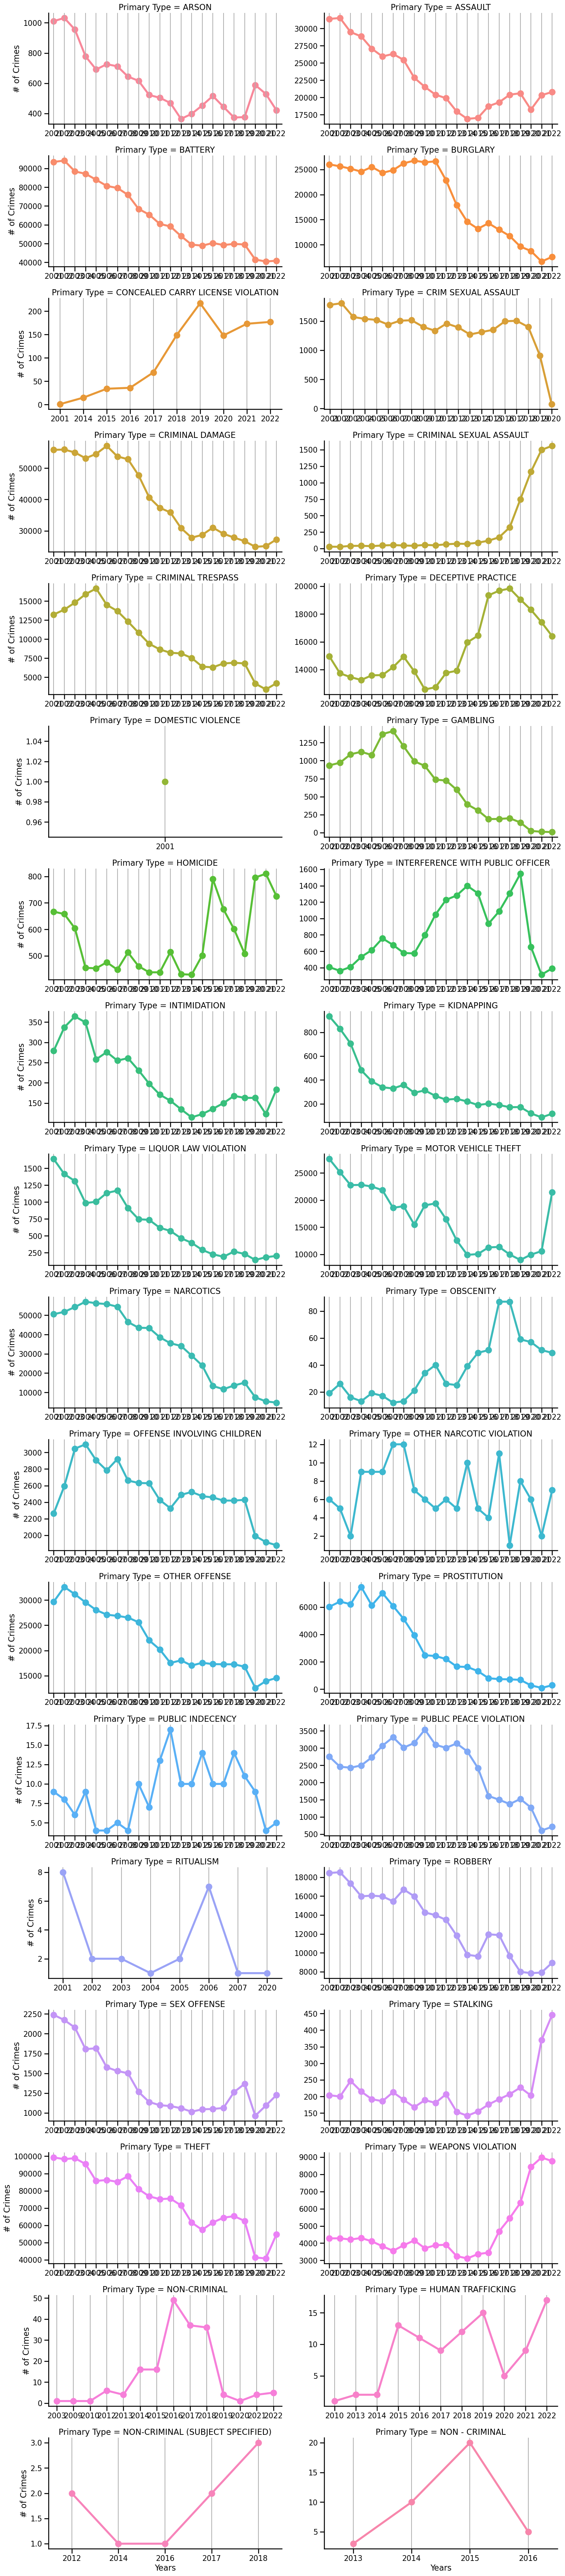

In [350]:
g = sns.catplot(data=plot_df, x='Years', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];



# Topic 3) Comparing AM vs. PM Rush Hour:

  * Answer the question: ​What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?
  * Answer the question: ​Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?

In [351]:
combined_df['Hourofday']= combined_df.index.hour
combined_df

,Primary Type,Location Description,Arrest,District,Years,Hourofday
Date,,,,,,
2001-01-01 01:00:00,BATTERY,RESIDENCE,False,16.0,2001,1
2001-01-01 13:00:00,BATTERY,RESIDENCE,False,8.0,2001,13
2001-01-01 13:00:00,GAMBLING,STREET,True,3.0,2001,13
2001-01-01 01:00:00,CRIMINAL DAMAGE,STREET,False,24.0,2001,1
2001-01-01 01:00:00,BATTERY,RESIDENCE PORCH/HALLWAY,False,2.0,2001,1
...,...,...,...,...,...,...
2022-12-31 12:50:00,ASSAULT,APARTMENT,False,10.0,2022,12
2022-12-31 12:50:00,ASSAULT,APARTMENT,False,7.0,2022,12
2022-12-31 00:52:00,BATTERY,BARBERSHOP,False,11.0,2022,0


In [352]:
combined_df['Hourofday'].value_counts()

12    442788
0     439921
19    434698
20    433216
18    421540
21    420474
22    413785
15    410154
17    395803
16    389010
14    388946
13    366287
23    343961
11    342088
9     333576
10    326996
8     260993
1     244531
2     206136
7     176082
3     166702
4     126578
6     123314
5     105530
Name: Hourofday, dtype: int64

In [353]:
# You can consider any crime that occurred between 7 AM - 10 AM as AM rush hour
# You can consider any crime that occurred between 4 - 7 PM as PM rush hour.




am_rush_hour =combined_df[ (combined_df['Hourofday']>= 7) & (combined_df['Hourofday']< 10)] 
pm_rush_hour = combined_df[ (combined_df['Hourofday']>= 4) & (combined_df['Hourofday'] <7)]
pm_rush_hour

,Primary Type,Location Description,Arrest,District,Years,Hourofday
Date,,,,,,
2001-01-01 04:00:00,THEFT,STREET,False,12.0,2001,4
2001-01-01 04:00:00,THEFT,STREET,False,12.0,2001,4
2001-01-01 04:00:00,MOTOR VEHICLE THEFT,STREET,False,9.0,2001,4
2001-01-01 04:00:00,OTHER OFFENSE,APARTMENT,False,3.0,2001,4
2001-01-01 04:00:00,CRIMINAL DAMAGE,STREET,False,25.0,2001,4
...,...,...,...,...,...,...
2022-12-31 06:30:00,BATTERY,APARTMENT,False,17.0,2022,6
2022-12-31 06:30:00,CRIMINAL DAMAGE,ALLEY,False,11.0,2022,6
2022-12-31 06:33:00,ASSAULT,PARKING LOT / GARAGE (NON RESIDENTIAL),True,7.0,2022,6


In [354]:
top_am_crims = am_rush_hour.value_counts().head()

* What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?

<Axes: >

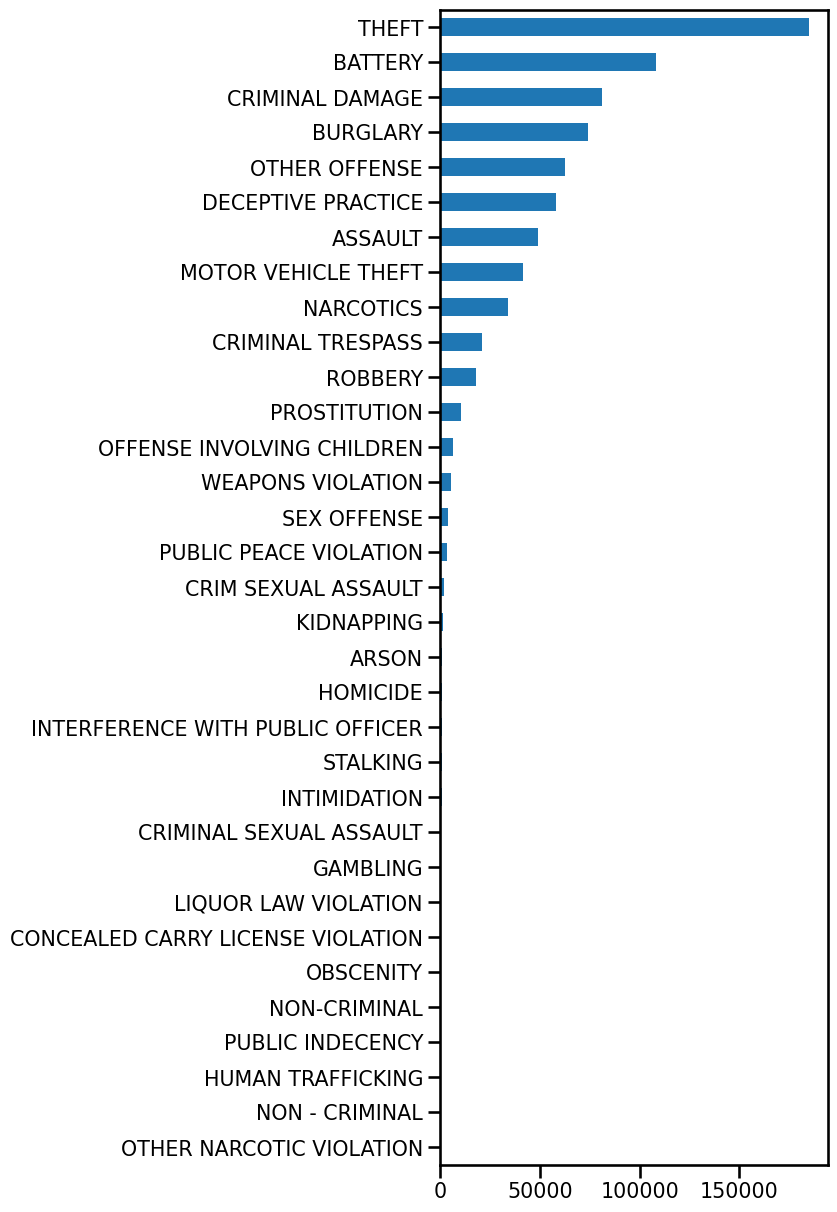

In [355]:
top_am_crims=am_rush_hour['Primary Type'].value_counts()
top_am_crims.sort_values().plot(kind= 'barh',figsize= (5,15))

<Axes: >

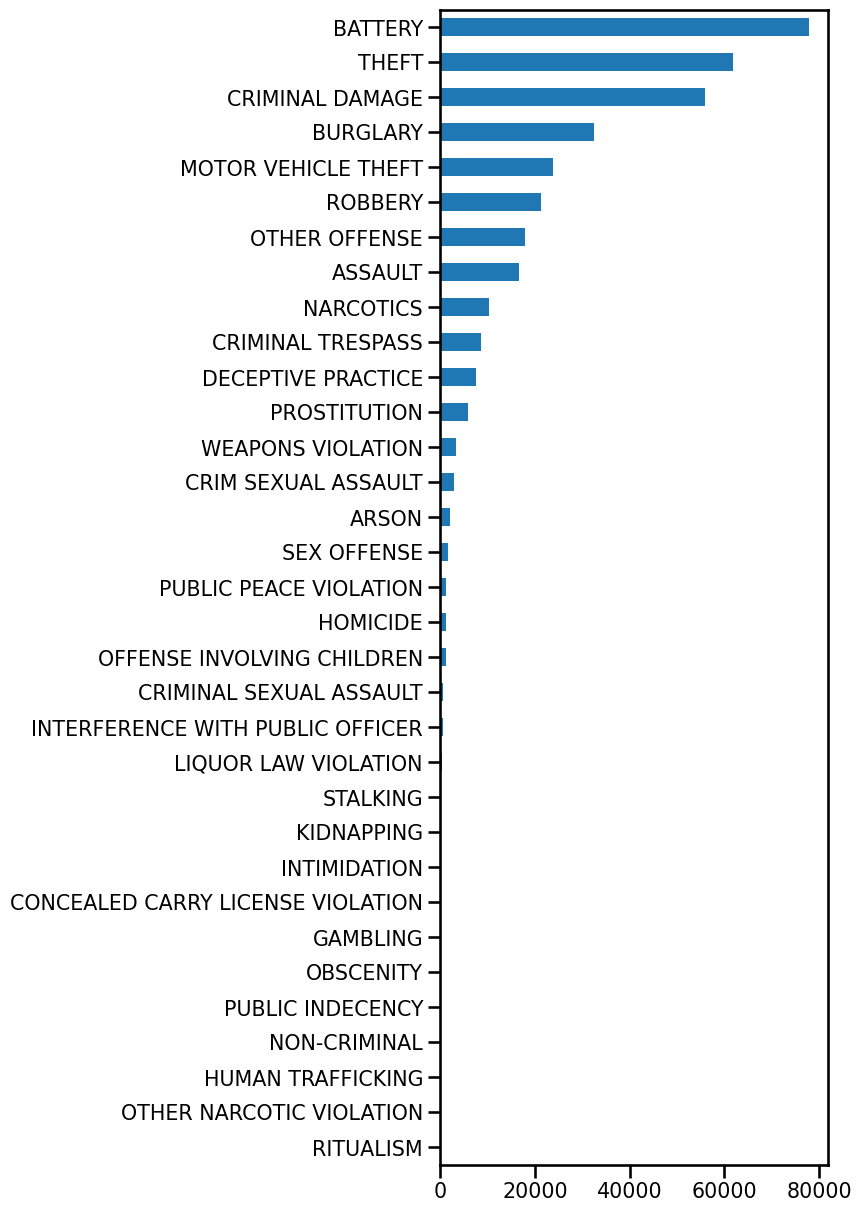

In [356]:
top_pm_crims= pm_rush_hour['Primary Type'].value_counts()
top_pm_crims.sort_values().plot(kind= 'barh',figsize= (5,15))

In [357]:
t=op_pm_crims =pm_rush_hour.value_counts().head()

In [358]:
am_motor_vehicle_thefts = am_rush_hour[am_rush_hour['Primary Type'] == 'MOTOR VEHICLE THEFT'].shape[0]
pm_motor_vehicle_thefts =  pm_rush_hour[pm_rush_hour['Primary Type']=='MOTOR VEHICLE THEFT'].shape[0]

print(f"Number of vehicle thefts during morning rush hour: {am_motor_vehicle_thefts}")
print(f"Number of vehicle thefts during evening rush hour: {pm_motor_vehicle_thefts}")

if am_motor_vehicle_thefts > pm_motor_vehicle_thefts:
 print("Vehicle thefts are more common during the morning rush hour.")
else:
 print("Vehicle thefts are more common during evening rush hour.")

Number of vehicle thefts during morning rush hour: 41578
Number of vehicle thefts during evening rush hour: 23813
Vehicle thefts are more common during the morning rush hour.


# Topic 4) Comparing Months
   * Answer the question: ​What months have the most crime? What months have the least?
   * Answer the question: Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [359]:
combined_df['Month']= combined_df.index.month
combined_df['MonthName'] = combined_df.index.month_name()
month_lookup =dict(zip(combined_df['Month'],combined_df['MonthName']))
month_lookup

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

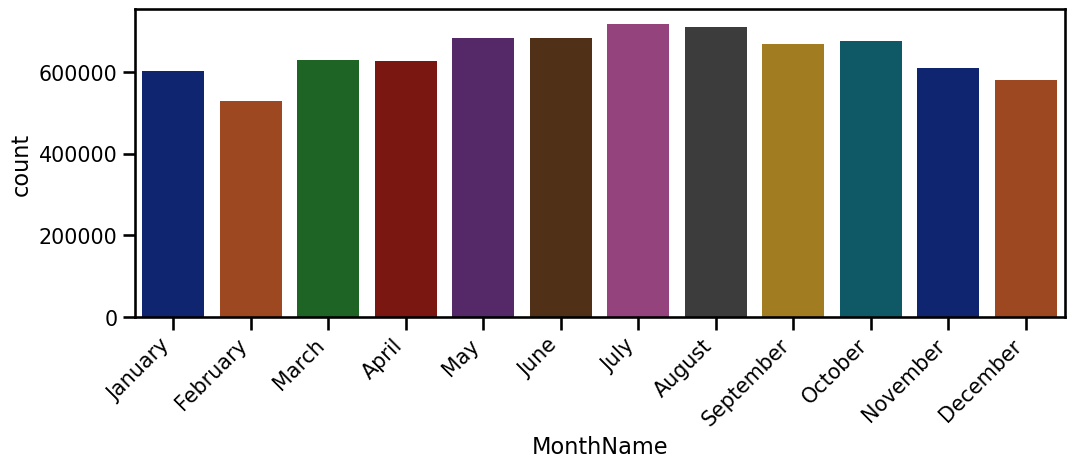

In [360]:
ax = sns.countplot(data=combined_df, x='MonthName',palette='dark',order=month_lookup.values());
# Rotate xtick labels and align the text to the bar
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

In [361]:
most_month_crime=combined_df['MonthName'].value_counts().to_frame('most # month crime')
most_month_crime

,most # month crime
July,717232
August,710444
May,682932
June,681739
October,676285
September,668242
March,629704
April,627175
November,608961
January,601236


In [362]:
## Get # of crimes by month
crimes_by_month = combined_df.groupby('Primary Type')['Month'].value_counts().sort_index()
crimes_by_month



Primary Type       Month
ARSON              1         917
                   2         807
                   3        1111
                   4        1097
                   5        1230
                            ... 
WEAPONS VIOLATION  8        9887
                   9        9435
                   10       9190
                   11       7952
                   12       7401
Name: Month, Length: 415, dtype: int64

In [363]:
plot_month=crimes_by_month.to_frame('of crimes').reset_index()
plot_month

,Primary Type,Month,of crimes
0,ARSON,1,917
1,ARSON,2,807
2,ARSON,3,1111
3,ARSON,4,1097
4,ARSON,5,1230
...,...,...,...
410,WEAPONS VIOLATION,8,9887
411,WEAPONS VIOLATION,9,9435
412,WEAPONS VIOLATION,10,9190
413,WEAPONS VIOLATION,11,7952


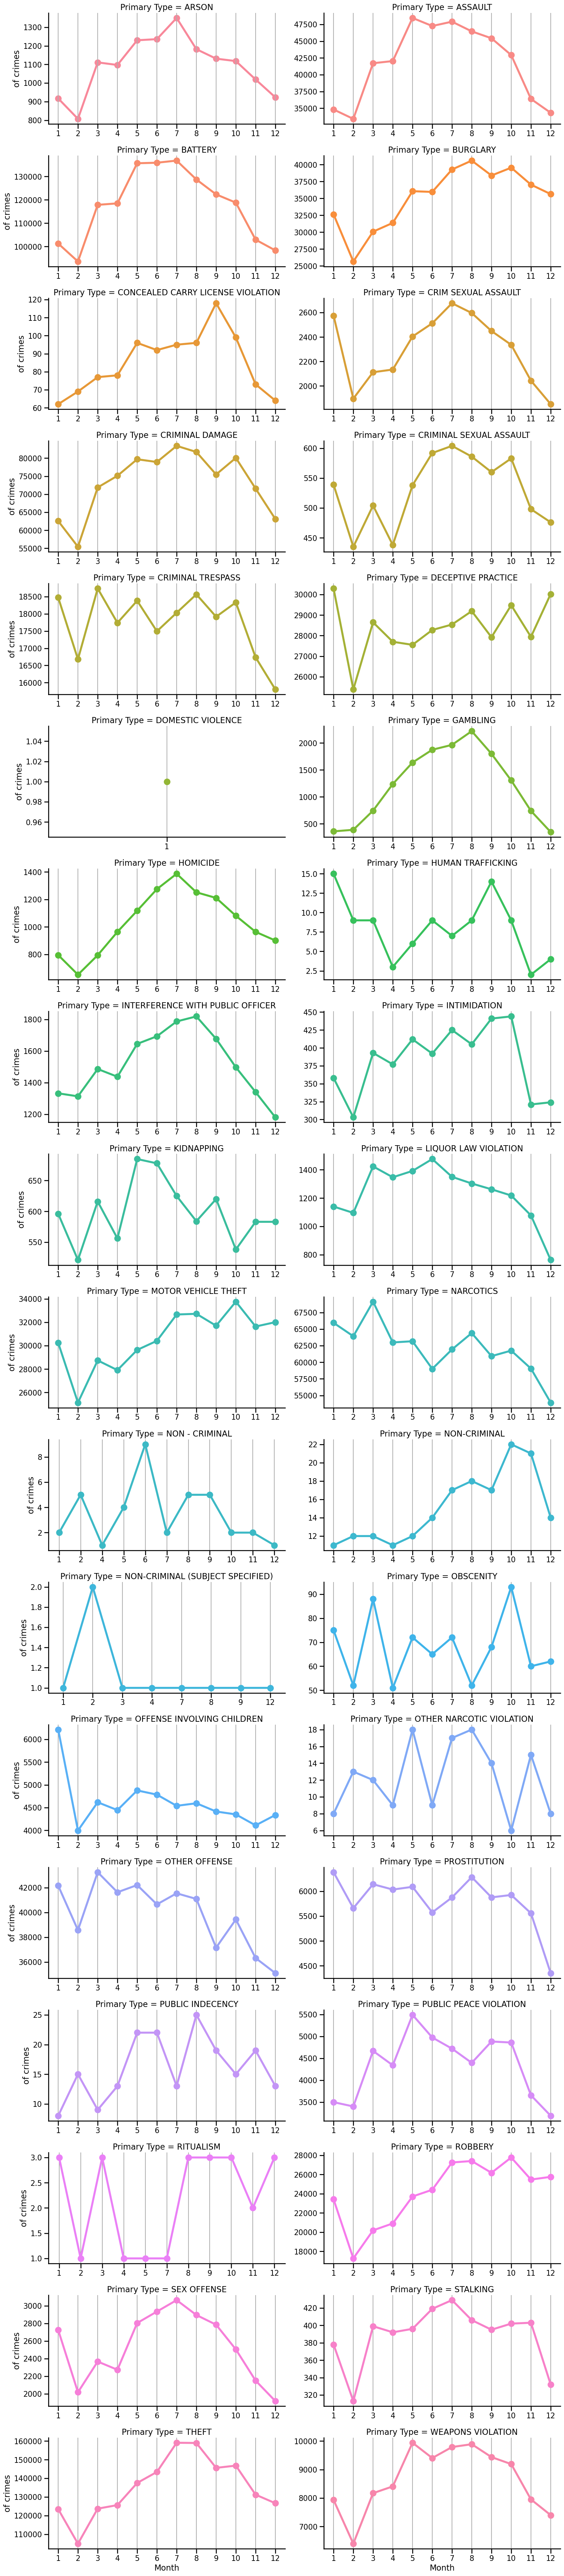

In [364]:
g = sns.catplot(data=plot_month, x='Month', y='of crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];




# Topic 5) Comparing Holidays:
 *  Answer the question: ​What are the top 3 holidays with the largest number of crimes?
 * Answer the question:  For each of the top 3 holidays with the most crime, what are the top 5 most common crimes on that holiday?

In [366]:
!pip install holidays
import holidays
import datetime as dt
from holidays import country_holidays



In [367]:
combined_df['date'] = combined_df.index.date
combined_df

,Primary Type,Location Description,Arrest,District,Years,Hourofday,Month,MonthName,date
Date,,,,,,,,,
2001-01-01 01:00:00,BATTERY,RESIDENCE,False,16.0,2001,1,1,January,2001-01-01
2001-01-01 13:00:00,BATTERY,RESIDENCE,False,8.0,2001,13,1,January,2001-01-01
2001-01-01 13:00:00,GAMBLING,STREET,True,3.0,2001,13,1,January,2001-01-01
2001-01-01 01:00:00,CRIMINAL DAMAGE,STREET,False,24.0,2001,1,1,January,2001-01-01
2001-01-01 01:00:00,BATTERY,RESIDENCE PORCH/HALLWAY,False,2.0,2001,1,1,January,2001-01-01
...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,ASSAULT,APARTMENT,False,10.0,2022,12,12,December,2022-12-31
2022-12-31 12:50:00,ASSAULT,APARTMENT,False,7.0,2022,12,12,December,2022-12-31
2022-12-31 00:52:00,BATTERY,BARBERSHOP,False,11.0,2022,0,12,December,2022-12-31


In [368]:
## making a date range that covers full dataset
all_days = pd.date_range(combined_df["date"].min(), combined_df["date"].max())
all_days



DatetimeIndex(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04',
               '2001-01-05', '2001-01-06', '2001-01-07', '2001-01-08',
               '2001-01-09', '2001-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=8035, freq='D')

In [369]:
## Create an instance of the US country holidays.
us_holidays = country_holidays('US')
us_holidays
## Testing first date
print(all_days[0])
us_holidays.get(all_days[0])


2001-01-01 00:00:00


"New Year's Day"

In [370]:
combined_df["US Holiday"] = [us_holidays.get(day) for day in combined_df['date']]

combined_df["US Holiday"] 

Date
2001-01-01 01:00:00    New Year's Day
2001-01-01 13:00:00    New Year's Day
2001-01-01 13:00:00    New Year's Day
2001-01-01 01:00:00    New Year's Day
2001-01-01 01:00:00    New Year's Day
                            ...      
2022-12-31 12:50:00              None
2022-12-31 12:50:00              None
2022-12-31 00:52:00              None
2022-12-31 12:52:00              None
2022-12-31 12:59:00              None
Name: US Holiday, Length: 7713109, dtype: object

* ​What are the top 3 holidays with the largest number of crimes?

In [460]:
holiday_crimes =  combined_df.groupby('US Holiday')['Primary Type'].size()
top3_holidays= holiday_crimes.head(3).to_frame('# of Crimes')
top3_holidays

,# of Crimes
US Holiday,
Christmas Day,12418
Christmas Day (Observed),4929
Columbus Day,20920


In [468]:
holiday_crimes_value=  combined_df.groupby('US Holiday')['Primary Type'].value_counts()
holiday_crimes_value= holiday_crimes_value.to_frame('crimes')
holiday_crimes_value

crimes
US Holiday            Primary Type                             
Christmas Day         BATTERY                              3431
                      THEFT                                1869
                      CRIMINAL DAMAGE                      1743
                      ASSAULT                               883
                      OTHER OFFENSE                         854
...                                                         ...
Washington's Birthday GAMBLING                               12
                      KIDNAPPING                             11
                      INTIMIDATION                           10
                      STALKING                                9
                      CONCEALED CARRY LICENSE VIOLATION       4

[443 rows x 1 columns]

In [503]:
# top 3 holidays with the most crime


top_holidys= ['Christmas Day','Christmas Day (Observed)','Columbus Day']
result_data = []
for day in top_holidys:
    data=holiday_crimes_value.loc[day].head(5)
    result_data.append(data)
    
final_result = pd.concat(result_data,keys=top_holidys, names=['US Holiday', 'Primary Type'])
final_result

crimes
US Holiday               Primary Type           
Christmas Day            BATTERY            3431
                         THEFT              1869
                         CRIMINAL DAMAGE    1743
                         ASSAULT             883
                         OTHER OFFENSE       854
Christmas Day (Observed) THEFT              1013
                         BATTERY             886
                         CRIMINAL DAMAGE     593
                         NARCOTICS           390
                         BURGLARY            360
Columbus Day             THEFT              4544
                         BATTERY            3534
                         CRIMINAL DAMAGE    2509
                         NARCOTICS          2007
                         OTHER OFFENSE      1344

<Axes: xlabel='US Holiday,Primary Type'>

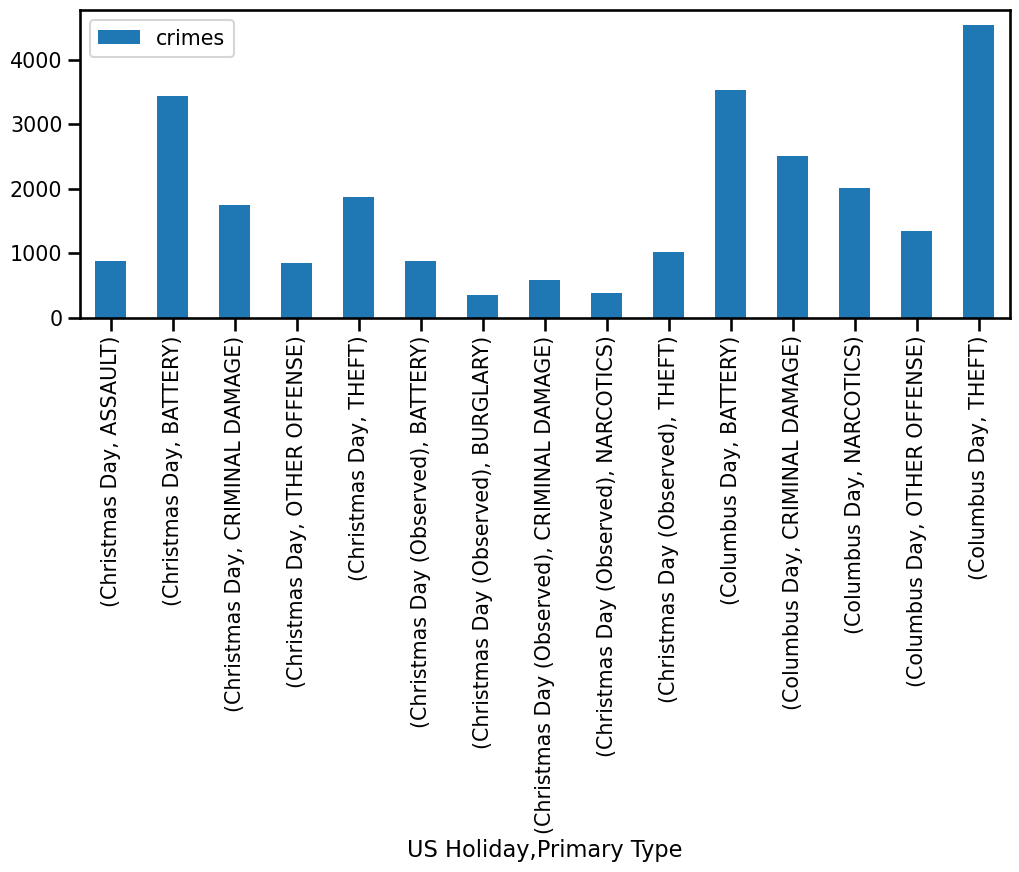

In [510]:
final_result.sort_index().plot(kind= 'bar')